<a href="https://colab.research.google.com/github/jiayuankeliang/309CourseWork2/blob/main/309CourseWork2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import moudle

In [118]:
import os
import numpy as np
from PIL import Image 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

load data

In [119]:
path = './data/train'
img_list= []
label_list = []
for label in os.listdir(path):
  for file_name in os.listdir(os.path.join(path, label)):
    img = Image.open(os.path.join(path, label, file_name))
    img = img.resize(size=(32,32))
    img_list.append(np.array(img))
    label_list.append(label)

all classes

In [120]:
class_name = ['speed_limit_20', 'speed_limit_30', 'speed_limit_50', 'speed_limit_60', 'speed_limit_70', 'speed_limit_80']

check shape

In [121]:
X_train = np.array(img_list, dtype=int)
Y_train = np.array(label_list, ndmin=1, dtype=int)
X_train.shape, Y_train.shape

((8289, 32, 32, 3), (8289,))

feature scale

In [122]:
X_train = X_train/255

show image

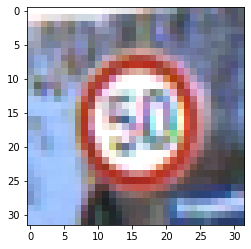

In [123]:
plt.imshow(X_train[4687])

create a simple model

In [125]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(6, activation="softmax"))
model.compile(loss = "sparse_categorical_crossentropy", optimizer=keras.optimizers.Adam(), metrics = ["accuracy"])
history = model.fit(X_train, Y_train, epochs = 30, validation_split=0.1)

Epoch 1/30
234/234 [==============================] - 8s 20ms/step - loss: 0.8640 - accuracy: 0.7027 - val_loss: 1.5296 - val_accuracy: 0.4306
Epoch 2/30
234/234 [==============================] - 6s 27ms/step - loss: 0.4237 - accuracy: 0.8523 - val_loss: 1.6631 - val_accuracy: 0.5935
Epoch 3/30
234/234 [==============================] - 5s 20ms/step - loss: 0.3172 - accuracy: 0.8909 - val_loss: 1.7650 - val_accuracy: 0.6647
Epoch 4/30
234/234 [==============================] - 6s 24ms/step - loss: 0.2452 - accuracy: 0.9149 - val_loss: 2.2915 - val_accuracy: 0.5368
Epoch 5/30
234/234 [==============================] - 6s 25ms/step - loss: 0.2267 - accuracy: 0.9227 - val_loss: 1.8965 - val_accuracy: 0.5501
Epoch 6/30
234/234 [==============================] - 5s 19ms/step - loss: 0.2028 - accuracy: 0.9294 - val_loss: 1.8056 - val_accuracy: 0.7153
Epoch 7/30
234/234 [==============================] - 6s 24ms/step - loss: 0.1903 - accuracy: 0.9314 - val_loss: 2.0014 - val_accuracy: 0.6803

train error and val error

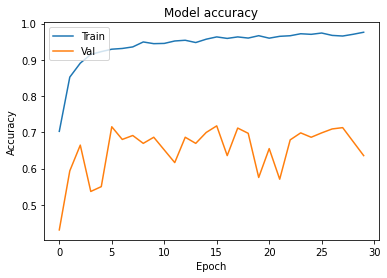

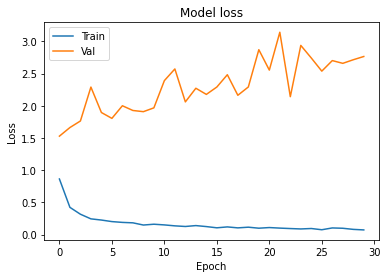

In [126]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

**😅overfitting**